In [387]:
!pip install imblearn

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
# data dumb store
import joblib
# to locate yaml file
import yaml
# to locate directore
import os
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [56]:
params_dir = "config/params.yaml"

In [57]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [58]:
params = load_params(params_dir)

In [59]:
params

{'dataset_dir': 'data/awal/',
 'int32_columns': ['age',
  'balance',
  'day',
  'duration',
  'campaign',
  'pdays',
  'previous'],
 'label': 'deposit',
 'label_deposit': ['no', 'yes'],
 'label_deposit_new': ['no', 'yes'],
 'missing_value_pdays': 0,
 'missing_value_balance': 630,
 'object_columns': ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'deposit'],
 'predictors': ['age',
  'job',
  'marital',
  'education',
  'default',
  'balance',
  'housing',
  'loan',
  'contact',
  'day',
  'month',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'poutcome'],
 'range_age': [18, 95],
 'range_balance': [-1, 81204],
 'range_day': [1, 31],
 'range_duration': [2, 3881],
 'range_campaign': [1, 63],
 'range_pdays': [-1, 854],
 'range_previous': [0, 58],
 'range_job': ['admin.',
  'technician',
  'services',
  'management',
  'retired',
  'blue-collar',
  'unemployed',
  'entrepreneur',
  'housemaid',
  'unknown',
  'self-empl

# Kesimpulan

- Outlier Removal (we'll try in the other trial)
- missing value `balance` diimputasi dgn median masing2 kelas
- missing value `pdays` di imputasi dgn 0

# Case

- Objective: Bank wants to increase the number of deposite by optimizing data-driven marketing strategy
- Concern: Short term revenue growth --> ML performance

# Load Dataset

In [2]:
x_train = joblib.load("data/raw/x_train.pkl")
y_train = joblib.load("data/raw/y_train.pkl")

x_valid = joblib.load("data/raw/x_valid.pkl")
y_valid = joblib.load("data/raw/y_valid.pkl")

x_test = joblib.load("data/raw/x_test.pkl")
y_test = joblib.load("data/raw/y_test.pkl")

In [3]:
dataset = pd.concat([x_train, y_train], axis = 1)

valid_set = pd.concat([x_valid, y_valid], axis = 1)

test_set = pd.concat([x_test, y_test], axis = 1)

# Handling Missing Values

In [4]:
# dataset
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# valid set
valid_set.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# test set
test_set.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# convert negative to null
def negative_to_null(data, col):
    data[col] = np.where(data[col] < 0, np.nan, data[col])
    return data[col]

In [8]:
# Function to check null
def check_null_per_class(data, col):
    # check null both of 2 classes and returning 2 values of both classes
    result = data[data.deposit == "yes"][col].isnull().sum(), data[data.deposit == "no"][col].isnull().sum() 
    return result

In [9]:
def imputer_per_class(data, col, impute_class1, impute_class0):
    # impute with value above
    data.loc[data[(data.deposit == "yes") & (data[col].isnull() == True)].index, col] = impute_class1
    data.loc[data[(data.deposit == "no") & (data[col].isnull() == True)].index, col] = impute_class0
    
    print('Missing values after imputation : ')
    
    return check_null_per_class(data, col)

## `pdays`

In [10]:
impute_pdays = int(0)

In [11]:
impute_pdays

0

### Training Set

In [12]:
# convert negative to null
dataset['pdays'] = negative_to_null(dataset, 'pdays')

In [13]:
check_null_per_class(dataset, 'pdays')

(2023, 2956)

In [14]:
imputer_per_class(dataset, 'pdays', impute_pdays, impute_pdays)

Missing values after imputation : 


(0, 0)

### Valid Set

In [15]:
# convert negative to null
valid_set['pdays'] = negative_to_null(valid_set, 'pdays')

In [16]:
check_null_per_class(valid_set, 'pdays')

(677, 1000)

In [17]:
imputer_per_class(valid_set, 'pdays', impute_pdays, impute_pdays)

Missing values after imputation : 


(0, 0)

### Test set

In [18]:
# convert negative to null
test_set['pdays'] = negative_to_null(test_set, 'pdays')

In [19]:
check_null_per_class(test_set, 'pdays')

(684, 984)

In [20]:
imputer_per_class(test_set, 'pdays', impute_pdays, impute_pdays)

Missing values after imputation : 


(0, 0)

## `balance`

In [21]:
impute_balance_1 = int(dataset[dataset.deposit == "yes"].balance.median())
impute_balance_0 = int(dataset[dataset.deposit == "no"].balance.median())

In [22]:
impute_balance_1, impute_balance_0

(747, 414)

### Training set

In [23]:
# convert negative to null
dataset['balance'] = negative_to_null(dataset, 'balance')

In [24]:
check_null_per_class(dataset, 'balance')

(118, 288)

In [25]:
imputer_per_class(dataset, 'balance', impute_balance_1, impute_balance_0)

Missing values after imputation : 


(0, 0)

### Valid set

In [26]:
# convert negative to null
valid_set['balance'] = negative_to_null(valid_set, 'balance')

In [27]:
check_null_per_class(valid_set, 'balance')

(42, 95)

In [28]:
imputer_per_class(valid_set, 'balance', impute_balance_1, impute_balance_0)

Missing values after imputation : 


(0, 0)

### Test set

In [29]:
# convert negative to null
test_set['balance'] = negative_to_null(test_set, 'balance')

In [30]:
check_null_per_class(test_set, 'balance')

(50, 95)

In [31]:
imputer_per_class(test_set, 'balance', impute_balance_1, impute_balance_0)

Missing values after imputation : 


(0, 0)

# Drop Categorical Feature w/ High Cardinality

In [32]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

we will drop `day`,`month` and `job`

In [33]:
# drop function
def drop_feature(data, feature):
    new_data = data.drop(feature, axis=1)
    return new_data

In [34]:
dataset = drop_feature(dataset, ['day','month', 'job'])
valid_set = drop_feature(valid_set, ['day','month', 'job'])
test_set = drop_feature(test_set, ['day','month', 'job'])

# Encoding

In [35]:
def encoding_cat_feature(data, fit=False, encoder=None):
    # get copy and reset_index
    data_copy = data.copy().reset_index(drop=True)
    target_col = data_copy['deposit']
    data_copy = data_copy.drop('deposit', axis=1)
    
    # category features
    cat_features = data_copy.select_dtypes(include='object').columns
    
    if fit:
        # Ohe initialization
        ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
        
        # fit transform
        ohe.fit(data_copy[cat_features])
        encoder = ohe
        encoded_df = pd.DataFrame(ohe.transform(data_copy[cat_features]).toarray())
    else:
        # use existing encoder object to transform
        encoded_df = pd.DataFrame(encoder.transform(data_copy[cat_features]).toarray())

    # rename columns
    encoded_df.columns = encoder.get_feature_names_out(cat_features)
    
    # drop original cat feature
    dropped_data = data_copy.drop(cat_features, axis=1)
    
    #merge one-hot encoded columns back with original DataFrame
    final_df = dropped_data.join([encoded_df, target_col])
    
    return encoder, final_df

## Training Set

In [38]:
encoder, dataset_fin = encoding_cat_feature(data = dataset,
                                            fit = True) 
                                   

dataset.shape, dataset_fin.shape

((6697, 14), (6697, 20))

In [39]:
dataset_fin.head()

,age,balance,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,39,94.0,181,2,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no
1,32,465.0,210,2,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,no
2,70,6422.0,122,1,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,yes
3,47,1144.0,324,1,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no
4,56,665.0,109,2,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,no


## Valid Set

In [40]:
_, valid_set_fin = encoding_cat_feature(data = valid_set,
                                        encoder = encoder)

valid_set.shape, valid_set_fin.shape

((2232, 14), (2232, 20))

In [41]:
valid_set_fin.head()

,age,balance,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,35,120.0,245,2,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,no
1,54,0.0,986,1,94.0,8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no
2,29,15.0,136,1,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no
3,41,6596.0,88,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,no
4,30,747.0,435,1,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,yes


## Test Set

In [42]:
_, test_set_fin = encoding_cat_feature(data = test_set,
                                       encoder = encoder)

test_set.shape, test_set_fin.shape

((2233, 14), (2233, 20))

In [43]:
test_set_fin.head()

,age,balance,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,49,2061.0,137,3,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,no
1,26,77.0,175,1,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,yes
2,27,246.0,453,2,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,yes
3,25,1231.0,412,5,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,yes
4,49,85.0,590,5,359.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,yes


# Balancing Label

<AxesSubplot:xlabel='deposit', ylabel='Count'>

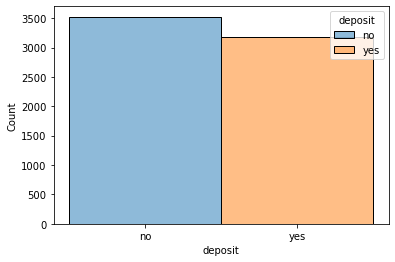

In [44]:
sns.histplot(data = dataset, x = "deposit", hue = "deposit")

In [45]:
rus = RandomUnderSampler(random_state = 26)
ros = RandomOverSampler(random_state = 11)
sm = SMOTE(random_state = 112)

In [46]:
def resampling(dataset, method):
    # resample
    x_resample, y_resample = method.fit_resample(dataset.drop("deposit", axis = 1), dataset.deposit)
    
    # concate
    dataset_resample = pd.concat([x_resample, y_resample], axis = 1)
    
    return dataset_resample, x_resample, y_resample

In [47]:
def plot_resampled(data, col):
    return sns.histplot(data, x = col, hue = col)

## Random Under Sampling

In [48]:
dataset_rus, x_rus, y_rus = resampling(dataset = dataset_fin,
                                       method = rus)

<AxesSubplot:xlabel='deposit', ylabel='Count'>

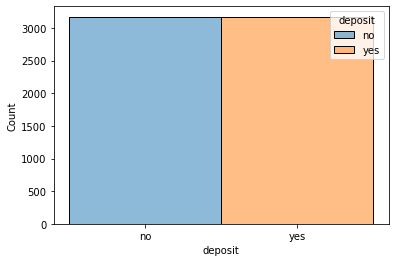

In [49]:
plot_resampled(dataset_rus, 'deposit')

## Random Over Sampling

In [50]:
dataset_ros, x_ros, y_ros = resampling(dataset = dataset_fin,
                                       method = ros)

<AxesSubplot:xlabel='deposit', ylabel='Count'>

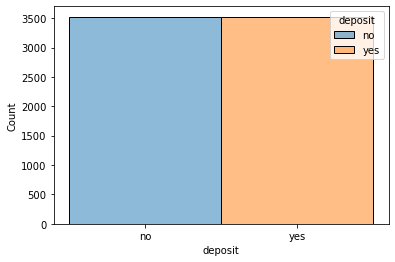

In [51]:
plot_resampled(dataset_ros, 'deposit')

## SMOTE

In [52]:
dataset_sm, x_sm, y_sm = resampling(dataset = dataset_fin,
                                     method = sm)

<AxesSubplot:xlabel='deposit', ylabel='Count'>

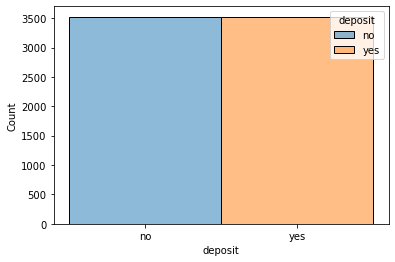

In [53]:
plot_resampled(dataset_sm, 'deposit')

# Label Encoding

In [60]:
le_deposit = LabelEncoder()

In [61]:
le_deposit.fit(params["label_deposit_new"])

LabelEncoder()

In [62]:
#joblib.dump(le_deposit, "model/le_deposit.pkl")

['model/le_deposit.pkl']

In [63]:
params["label_deposit_new"]

['no', 'yes']

# Set

## Undersampling Set

In [64]:
list(y_rus.unique()) == params["label_deposit_new"]

True

In [65]:
y_rus = le_deposit.transform(y_rus)

## Oversampling Set

In [66]:
list(y_ros.unique()) == params["label_deposit_new"]

True

In [67]:
y_ros = le_deposit.transform(y_ros)

## SMOTE Set

In [68]:
list(y_sm.unique()) == params["label_deposit_new"]

True

In [69]:
y_sm = le_deposit.transform(y_sm)

## Validation Set

In [70]:
valid_set_fin.deposit.unique()

array(['no', 'yes'], dtype=object)

In [71]:
params["label_deposit_new"]

['no', 'yes']

In [72]:
len(set(valid_set.deposit.unique()) - set(params["label_deposit_new"])) == 0

True

In [73]:
valid_set_fin.deposit = le_deposit.transform(valid_set_fin.deposit)

## Test Set

In [74]:
len(set(test_set_fin.deposit.unique()) - set(params["label_deposit_new"])) == 0

True

In [75]:
test_set_fin.deposit = le_deposit.transform(test_set_fin.deposit)

# Dump Data

In [77]:
joblib.dump(x_rus, "data/processed/x_rus.pkl")
joblib.dump(y_rus, "data/processed/y_rus.pkl")

joblib.dump(x_ros, "data/processed/x_ros.pkl")
joblib.dump(y_ros, "data/processed/y_ros.pkl")

joblib.dump(x_sm, "data/processed/x_sm.pkl")
joblib.dump(y_sm, "data/processed/y_sm.pkl")

joblib.dump(valid_set_fin.drop(columns = "deposit"), "data/processed/x_valid_feng.pkl")
joblib.dump(valid_set_fin.deposit, "data/processed/y_valid_feng.pkl")

joblib.dump(test_set_fin.drop(columns = "deposit"), "data/processed/x_test_feng.pkl")
joblib.dump(test_set_fin.deposit, "data/processed/y_test_feng.pkl")

joblib.dump(encoder, "model/ohe_encoder.pkl")
joblib.dump(le_deposit, "model/le_deposit.pkl")

['model/le_deposit.pkl']